<a href="https://colab.research.google.com/github/FATEMA-MITU-11/edge-project/blob/main/edge_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: create a csv file with Student Name, Student ID
# ○ Subject, Score, Attendance Percentage
# ○ Assignment Completion (Yes/No)

import csv

data = [
    ['Student Name', 'Student ID', 'Subject', 'Score', 'Attendance Percentage', 'Assignment Completion'],
]

with open('students_data.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)


In [ ]:

import csv

def input_data():
    student_name = input("Enter Student Name: ")
    student_id = input("Enter Student ID: ")
    subject = input("Enter Subject: ")
    score = input("Enter Score: ")
    attendance = input("Enter Attendance Percentage: ")
    assignment_completion = input("Enter Assignment Completion (Yes/No): ")

    data = [student_name, student_id, subject, score, attendance, assignment_completion]

    with open('students_data.csv', 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(data)
input_data()


Enter Student Name: MOMI
Enter Student ID: 34
Enter Subject: CSE
Enter Score: 56
Enter Attendance Percentage: 40
Enter Assignment Completion (Yes/No): YES


In [ ]:
# prompt: save the information ofstudent_name, student_id, subject, score, attendance, assignment_completion information which is inputed by users

import csv

def input_data():
    student_name = input("Enter Student Name: ")
    student_id = input("Enter Student ID: ")
    subject = input("Enter Subject: ")
    score = input("Enter Score: ")
    attendance = input("Enter Attendance Percentage: ")
    assignment_completion = input("Enter Assignment Completion (Yes/No): ")

    data = [student_name, student_id, subject, score, attendance, assignment_completion]

    with open('students_data.csv', 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(data)

# Check if the file exists, if not create it with header
try:
    with open('students_data.csv', 'r') as csvfile:
        pass  # Just check if file exists, no need to read
except FileNotFoundError:
    with open('students_data.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Student Name', 'Student ID', 'Subject', 'Score', 'Attendance Percentage', 'Assignment Completion'])


while True:
    input_data()
    another = input("Do you want to add more data? (yes/no): ")
    if another.lower() != 'yes':
        break

Enter Student Name: MEEM
Enter Student ID: STU-35456
Enter Subject: math
Enter Score: 89
Enter Attendance Percentage: 70
Enter Assignment Completion (Yes/No): yes
Do you want to add more data? (yes/no): yes
Enter Student Name: meem
Enter Student ID: STU-35456
Enter Subject: STATISTICS
Enter Score: 60
Enter Attendance Percentage: 60
Enter Assignment Completion (Yes/No): YES
Do you want to add more data? (yes/no): NO


In [ ]:
59# prompt: Use File Handling to:
# ○ Read the CSV file.
# ○ Write modified or updated data back to a new CSV file.

import csv

def modify_data():
    # Read existing data
    data = []
    try:
        with open('students_data.csv', 'r', newline='') as csvfile:
            reader = csv.reader(csvfile)
            for row in reader:
                data.append(row)
    except FileNotFoundError:
        print("Error: 'students_data.csv' not found.")
        return

    # Modify data (Example: Update Score for a specific student)
    student_id_to_update = input("Enter Student ID to update score: ")
    new_score = input("Enter new score: ")
    for row in data:
        if len(row) > 1 and row[1] == student_id_to_update:  # Check for valid row and ID
            row[3] = new_score
            print(f"Updated score for Student ID {student_id_to_update}")
            break
    else:
        print(f"Student ID {student_id_to_update} not found.")

    # Write updated data to a new CSV file
    with open('modified_students_data.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerows(data)


modify_data()

Enter Student ID to update score: 56
Enter new score: 59
Updated score for Student ID 56


In [ ]:
# Pandas and DataFrames:
# ○ Analyze average, minimum, and maximum scores per student.
# ○ Identify students with attendance < 75% or missing assignments.

import pandas as pd

def analyze_student_data(filepath):
    try:
        df = pd.read_csv(filepath)

        # Analyze average, minimum, and maximum scores per student
        score_summary = df.groupby('Student Name')['Score'].agg(['mean', 'min', 'max'])
        print("Score Summary per Student:\n", score_summary)

        # Identify students with attendance < 75% or missing assignments
        df['Attendance Percentage'] = pd.to_numeric(df['Attendance Percentage'], errors='coerce')
        low_attendance = df[(df['Attendance Percentage'] < 75) | (df['Assignment Completion'] == 'No')]
        print("\nStudents with low attendance or missing assignments:\n", low_attendance)

    except FileNotFoundError:
        print(f"Error: File '{filepath}' not found.")
    except KeyError as e:
        print(f"Error: Column '{e}' not found in the CSV file. Please ensure the CSV has the correct header.")
    except pd.errors.EmptyDataError:
        print(f"Error: File '{filepath}' is empty.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


# Example usage with 'students_data.csv' and 'modified_students_data.csv'
analyze_student_data('students_data.csv')
analyze_student_data('modified_students_data.csv')

Score Summary per Student:
               mean  min  max
Student Name                
KASHFIA       53.0   53   53
MEEM          89.0   89   89
MOMI          56.0   56   56
meem          60.0   60   60

Students with low attendance or missing assignments:
   Student Name Student ID     Subject  Score  Attendance Percentage  \
0         MOMI         34         CSE     56                     40   
1      KASHFIA         56     ENGLISH     53                     49   
2         MEEM  STU-35456        math     89                     70   
3         meem  STU-35456  STATISTICS     60                     60   

  Assignment Completion  
0                   YES  
1                   YES  
2                   yes  
3                   YES  
Score Summary per Student:
               mean  min  max
Student Name                
KASHFIA       59.0   59   59
MEEM          89.0   89   89
MOMI          56.0   56   56
meem          60.0   60   60

Students with low attendance or missing assignments:
 

In [ ]:
import pandas as pd

def filter_failing_students():
    # Hardcoded values for file name, subject, and passing score
    file_name = "students_data.csv"
    subject = "math"
    passing_score = 85

    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_name)

        # Ensure 'Score' column is numeric, coercing errors to NaN
        df['Score'] = pd.to_numeric(df['Score'], errors='coerce')

        # Filter students failing the specific subject
        failing_students = df[(df['Subject'] == subject) & (df['Score'] < passing_score)]

        # Display the results
        if not failing_students.empty:
            print(f"\nStudents failing {subject} (below {passing_score}):\n", failing_students)
        else:
            print(f"\nNo students found failing {subject} (below {passing_score}).")

    except FileNotFoundError:
        print(f"Error: File '{file_name}' not found.")
    except KeyError as e:
        print(f"Error: Column '{e}' not found in the CSV file. Please ensure the CSV has the correct header.")
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_name}' is empty.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Call the function to filter students failing math with a score below 85
filter_failing_students()



No students found failing math (below 85).


In [ ]:
import pandas as pd

# Load the CSV file
file_name = "students_data.csv"

# Read the file into a DataFrame
try:
    data = pd.read_csv(file_name)
except FileNotFoundError:
    print(f"File {file_name} not found!")
    exit()

# Ensure there is a 'score' column
if "Score" not in data.columns:
    print("The 'score' column is missing from the dataset!")
    exit()

# Function to convert score values to integers if they are strings
def convert_score(value):
    try:
        # Convert to integer if it's a string representation of a number
        return int(value)
    except (ValueError, TypeError):
        # Return the original value if conversion is not possible
        return value

# Apply the function to the 'score' column
data["Score"] = data["Score"].apply(convert_score)

# Check for any non-integer values remaining in the 'score' column
non_integer_values = data["Score"].apply(lambda x: not isinstance(x, int)).sum()

if non_integer_values > 0:
    print(f"Warning: There are {non_integer_values} non-integer values in the 'score' column after processing.")

# Save the processed data to a new file
output_file_name = "students_data.csv"
data.to_csv(output_file_name, index=False)

print(f"Processing complete. The updated data has been saved to {output_file_name}.")


Processing complete. The updated data has been saved to students_data.csv.


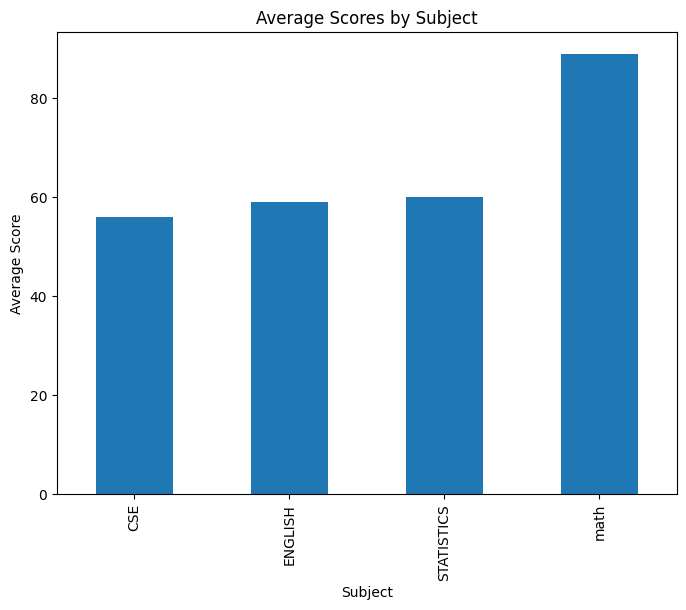

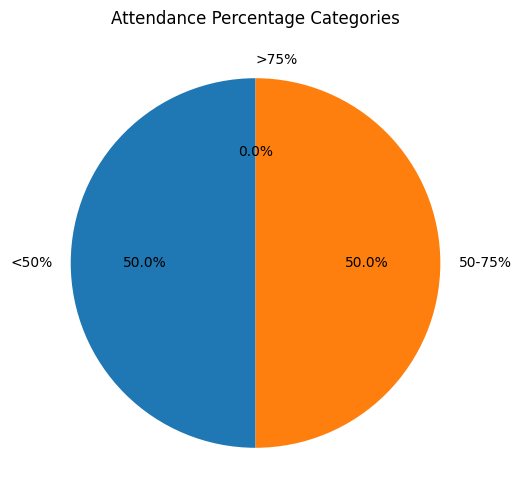

Error: 'Date' column not found in the DataFrame. Cannot create the line graph.


In [ ]:
# prompt: Use  Matplotlib  or  Pandas Visualization  to:
# ○  Plot a bar chart of average scores by subject.
# ○  Display a pie chart of attendance percentage categories (e.g., <50%, 50-75%,
# >75%).
# ○  Create a line graph showing performance trends over time for a selected student.

import pandas as pd
import matplotlib.pyplot as plt

# Load the data (replace 'modified_students_data.csv' with your actual file)
try:
    df = pd.read_csv('modified_students_data.csv')
    # Convert 'Score' and 'Attendance Percentage' to numeric, handling errors
    df['Score'] = pd.to_numeric(df['Score'], errors='coerce')
    df['Attendance Percentage'] = pd.to_numeric(df['Attendance Percentage'], errors='coerce')
except FileNotFoundError:
    print("Error: 'modified_students_data.csv' not found.")
    exit()
except pd.errors.EmptyDataError:
    print("Error: 'modified_students_data.csv' is empty.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    exit()


# 1. Bar chart of average scores by subject
average_scores = df.groupby('Subject')['Score'].mean()
plt.figure(figsize=(8, 6))
average_scores.plot(kind='bar')
plt.title('Average Scores by Subject')
plt.xlabel('Subject')
plt.ylabel('Average Score')
plt.show()

# 2. Pie chart of attendance percentage categories
attendance_bins = [0, 50, 75, 100]
attendance_labels = ['<50%', '50-75%', '>75%']
df['Attendance Category'] = pd.cut(df['Attendance Percentage'], bins=attendance_bins, labels=attendance_labels, right=False)
attendance_counts = df['Attendance Category'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(attendance_counts, labels=attendance_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Attendance Percentage Categories')
plt.show()


# 3. Line graph showing performance trends over time (assuming a 'Date' column exists)
# If there's no date, you'll need to add one or use another identifier for time.
if 'Date' in df.columns:
  student_name = input("Enter the student name to display performance trends: ")

  student_data = df[df['Student Name'] == student_name]
  if not student_data.empty:
      plt.figure(figsize=(10, 6))
      plt.plot(student_data['Date'], student_data['Score'])
      plt.xlabel('Date')
      plt.ylabel('Score')
      plt.title(f"Performance Trend for {student_name}")
      plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
      plt.tight_layout()  # Adjust layout to prevent labels from overlapping
      plt.show()
  else:
      print(f"No data found for student: {student_name}")
else:
    print("Error: 'Date' column not found in the DataFrame. Cannot create the line graph.")

Enter the student ID to display performance trends: STU-35456


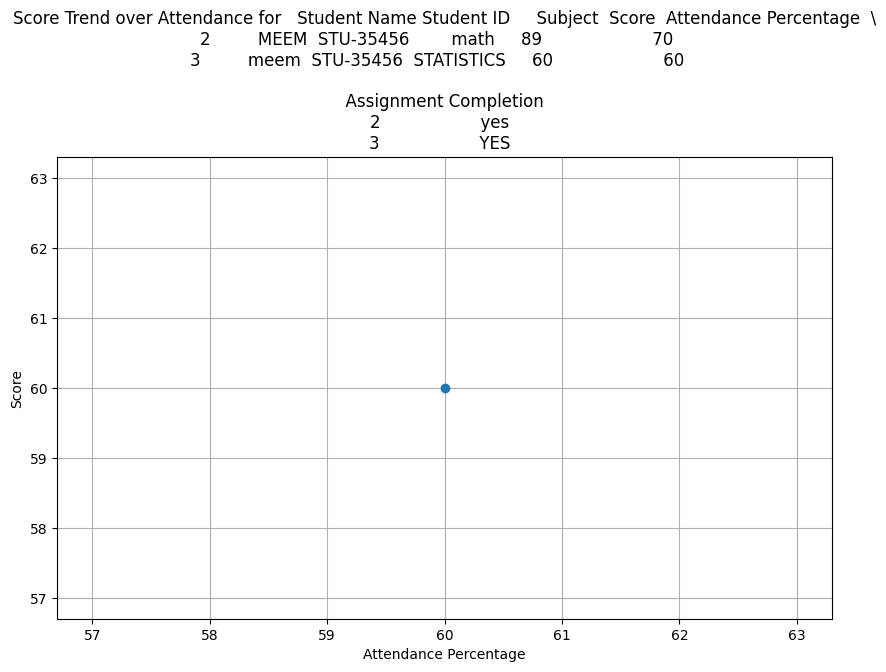

In [ ]:
# prompt:  Create a line graph showing Scores trends over Attendance for a selected student.

import pandas as pd
import matplotlib.pyplot as plt

# Load the data (replace 'modified_students_data.csv' with your actual file)
try:
    df = pd.read_csv('modified_students_data.csv')
    # Convert 'Score' and 'Attendance Percentage' to numeric, handling errors
    df['Score'] = pd.to_numeric(df['Score'], errors='coerce')
    df['Attendance Percentage'] = pd.to_numeric(df['Attendance Percentage'], errors='coerce')
except FileNotFoundError:
    print("Error: 'modified_students_data.csv' not found.")
    exit()
except pd.errors.EmptyDataError:
    print("Error: 'modified_students_data.csv' is empty.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    exit()

# ... (rest of your code)

# 3. Line graph showing Scores trends over Attendance for a selected student
Student_ID = input("Enter the student ID to display performance trends: ")
Student_ID = df[df['Student ID'] == Student_ID]

if not student_data.empty:
    plt.figure(figsize=(10, 6))
    plt.plot(student_data['Attendance Percentage'], student_data['Score'], marker='o')  # Added markers
    plt.xlabel('Attendance Percentage')
    plt.ylabel('Score')
    plt.title(f"Score Trend over Attendance for {Student_ID}")
    plt.grid(True)  # Added grid for better readability
    plt.show()
else:
    print(f"No data found for student: {Student_ID}")

In [ ]:
# prompt: Applying Functions and Logic
# ●  Implement  Functions  for:
# ○  Calculating aggregate scores for each student.
# ○  Determining grade (A/B/C/Fail) based on scoring criteria.
# ○  Generating student performance reports in a user-friendly format.

def calculate_aggregate_score(df):
    # Assuming 'Score', 'Attendance Percentage', and 'Assignment Completion' columns exist
    # and 'Assignment Completion' is 'Yes' or 'No'.  Adjust as needed for your data.
    df['Assignment Points'] = df['Assignment Completion'].apply(lambda x: 10 if x == 'Yes' else 0)
    df['Aggregate Score'] = 0.6 * df['Score'] + 0.3 * df['Attendance Percentage'] + 0.1 * df['Assignment Points']
    return df

def determine_grade(aggregate_score):
    if aggregate_score >= 90:
        return 'A'
    elif aggregate_score >= 80:
        return 'B'
    elif aggregate_score >= 70:
        return 'C'
    else:
        return 'Fail'

def generate_student_report(df):
    df = calculate_aggregate_score(df)
    df['Grade'] = df['Aggregate Score'].apply(determine_grade)

    # Generate report
    for index, row in df.iterrows():
        print("-" * 30)
        print(f"Student Name: {row['Student Name']}")
        print(f"Student ID: {row['Student ID']}")
        print(f"Subject: {row['Subject']}")
        print(f"Score: {row['Score']}")
        print(f"Attendance Percentage: {row['Attendance Percentage']}%")
        print(f"Assignment Completion: {row['Assignment Completion']}")
        print(f"Aggregate Score: {row['Aggregate Score']:.2f}")
        print(f"Grade: {row['Grade']}")
        print("-" * 30)

# Example usage: Assuming 'df' is your DataFrame from the previous code
# Load the data (replace 'modified_students_data.csv' with your actual file)
try:
    df = pd.read_csv('modified_students_data.csv')
    # Convert 'Score' and 'Attendance Percentage' to numeric, handling errors
    df['Score'] = pd.to_numeric(df['Score'], errors='coerce')
    df['Attendance Percentage'] = pd.to_numeric(df['Attendance Percentage'], errors='coerce')
except FileNotFoundError:
    print("Error: 'modified_students_data.csv' not found.")
    exit()
except pd.errors.EmptyDataError:
    print("Error: 'modified_students_data.csv' is empty.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    exit()


generate_student_report(df)

------------------------------
Student Name: MOMI
Student ID: 34
Subject: CSE
Score: 56
Attendance Percentage: 40%
Assignment Completion: YES
Aggregate Score: 45.60
Grade: Fail
------------------------------
------------------------------
Student Name: KASHFIA
Student ID: 56
Subject: ENGLISH
Score: 59
Attendance Percentage: 49%
Assignment Completion: YES
Aggregate Score: 50.10
Grade: Fail
------------------------------
------------------------------
Student Name: MEEM
Student ID: STU-35456
Subject: math
Score: 89
Attendance Percentage: 70%
Assignment Completion: yes
Aggregate Score: 74.40
Grade: C
------------------------------
------------------------------
Student Name: meem
Student ID: STU-35456
Subject: STATISTICS
Score: 60
Attendance Percentage: 60%
Assignment Completion: YES
Aggregate Score: 54.00
Grade: Fail
------------------------------


In [ ]:
import re
from datetime import datetime

def log_execution(func):
    """
    Decorator to log when a particular function is executed.
    """
    def wrapper(*args, **kwargs):
        with open("execution_log.txt", "a") as log_file:
            log_file.write(f"Function '{func.__name__}' executed at {datetime.now()}\n")
        return func(*args, **kwargs)
    return wrapper

# Exception Handling Example
@log_execution
def read_file(file_path):
    """
    Reads a file and returns its contents.
    Handles FileNotFoundError.
    """
    try:
        with open(file_path, "r") as file:
            return file.read()
    except FileNotFoundError:
        print("Error: File not found.")
        return None

@log_execution
def divide_numbers(a, b):
    """
    Divides two numbers.
    Handles division by zero.
    """
    try:
        return a / b
    except ZeroDivisionError:
        print("Error: Division by zero is not allowed.")
        return None

# Regular Expressions Example
@log_execution
def validate_student_id(student_id):
    """
    Validates a student ID based on the pattern STU-12345.
    """
    pattern = r"^STU-\d{5}$"
    if re.match(pattern, student_id):
        print("Valid Student ID.")
        return True
    else:
        print("Invalid Student ID. Format should be 'STU-12345'.")
        return False

# Testing the functions
if __name__ == "__main__":
    # Test exception handling
    print("Reading file...")
    content = read_file("students_data.csv")
    print("File content:", content)

    print("\nDividing numbers...")
    result = divide_numbers(10, 0)
    print("Division result:", result)

    # Test regular expression validation
    print("\nValidating Student ID...")
    is_valid = validate_student_id("STU-12345")
    print("Is valid:", is_valid)

    is_valid = validate_student_id("12345-STU")
    print("Is valid:", is_valid)


Reading file...
File content: Student Name,Student ID,Subject,Score,Attendance Percentage,Assignment Completion
MOMI,34,CSE,56,40,YES
KASHFIA,56,ENGLISH,53,49,YES
MEEM,STU-35456,math,89,70,yes
meem,STU-35456,STATISTICS,60,60,YES


Dividing numbers...
Error: Division by zero is not allowed.
Division result: None

Validating Student ID...
Valid Student ID.
Is valid: True
Invalid Student ID. Format should be 'STU-12345'.
Is valid: False


In [ ]:
import re
from datetime import datetime

def log_execution(func):
    """
    Decorator to log when a particular function is executed.
    """
    def wrapper(*args, **kwargs):
        with open("execution_log.txt", "a") as log_file:
            log_file.write(f"Function '{func.__name__}' executed at {datetime.now()}\n")
        return func(*args, **kwargs)
    return wrapper

# Exception Handling Example
@log_execution
def read_file(file_path):
    """
    Reads a file and returns its contents.
    Handles FileNotFoundError.
    """
    try:
        with open(file_path, "r") as file:
            return file.read()
    except FileNotFoundError:
        print("Error: File not found.")
        return None

@log_execution
def divide_numbers(a, b):
    """
    Divides two numbers.
    Handles division by zero.
    """
    try:
        return a / b
    except ZeroDivisionError:
        print("Error: Division by zero is not allowed.")
        return None

# Regular Expressions Example
@log_execution
def validate_student_id(student_id):
    """
    Validates a student ID based on the pattern STU-12345.
    """
    pattern = r"^STU-\d{5}$"
    if re.match(pattern, student_id):
        print("Valid Student ID.")
        return True
    else:
        print("Invalid Student ID. Format should be 'STU-12345'.")
        return False

# Testing the functions
if __name__ == "__main__":
    # Test exception handling
    file_path = "students_data.csv"
    print("Reading file...")
    content = read_file(file_path)
    print("File content:", content)

    print("\nDividing numbers...")
    result = divide_numbers(10, 0)
    print("Division result:", result)

    # Test regular expression validation
    print("\nValidating Student ID...")
    is_valid = validate_student_id("STU-12345")
    print("Is valid:", is_valid)

    is_valid = validate_student_id("12345-STU")
    print("Is valid:", is_valid)


Reading file...
File content: Student Name,Student ID,Subject,Score,Attendance Percentage,Assignment Completion
mitu,stu-034,ststistics,40,79,yes
anonna,89,real analysis,89,90,yes
mitu,stu-034,real analysis,78,yes,no
meem,STU-23445,math,40,80,no


Dividing numbers...
Error: Division by zero is not allowed.
Division result: None

Validating Student ID...
Valid Student ID.
Is valid: True
Invalid Student ID. Format should be 'STU-12345'.
Is valid: False


In [ ]:
# prompt: Interactive Console Input/Output
# ●  Allow the user to:
# ○  Add a new student’s data via console inputs.
# ○  Search for a student by name or ID.
# ○  Update a student's score or attendance.

def search_student():
    search_term = input("Enter student name or ID to search: ")
    try:
        df = pd.read_csv('modified_students_data.csv')
        # Search by name or ID
        results = df[
            (df['Student Name'].str.contains(search_term, case=False)) | (df['Student ID'] == search_term)
        ]
        if not results.empty:
            print(results)
        else:
            print(f"No student found with name or ID containing '{search_term}'.")
    except FileNotFoundError:
        print("Error: 'modified_students_data.csv' not found.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

def update_student():
    student_id_to_update = input("Enter Student ID to update: ")
    try:
      df = pd.read_csv('modified_students_data.csv')
      if student_id_to_update in df['Student ID'].values:
          update_field = input("Enter field to update (Score, Attendance Percentage, Assignment Completion): ")
          new_value = input(f"Enter new {update_field}: ")

          if update_field == "Score":
              try:
                  new_value = int(new_value) # Convert to integer if score
              except ValueError:
                  print("Invalid score. Please enter an integer.")
                  return
          # Update the DataFrame
          df.loc[df['Student ID'] == student_id_to_update, update_field] = new_value
          # Save the changes back to the CSV file
          df.to_csv('modified_students_data.csv', index=False)
          print(f"Updated {update_field} for Student ID {student_id_to_update}")
      else:
          print(f"Student ID '{student_id_to_update}' not found.")
    except FileNotFoundError:
        print("Error: 'modified_students_data.csv' not found.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

while True:
    print("\nStudent Management System")
    print("1. Add Student")
    print("2. Search Student")
    print("3. Update Student")
    print("4. Exit")

    choice = input("Enter your choice: ")

    if choice == '1':
        input_data()
    elif choice == '2':
        search_student()
    elif choice == '3':
        update_student()
    elif choice == '4':
        break
    else:
        print("Invalid choice. Please try again.")


Student Management System
1. Add Student
2. Search Student
3. Update Student
4. Exit
Enter your choice: 1
Enter Student Name: MOU
Enter Student ID: STU-13436
Enter Subject: STAT
Enter Score: 67
Enter Attendance Percentage: 89
Enter Assignment Completion (Yes/No): YES

Student Management System
1. Add Student
2. Search Student
3. Update Student
4. Exit
Enter your choice: 2
Enter student name or ID to search: 56
  Student Name Student ID  Subject  Score  Attendance Percentage  \
1      KASHFIA         56  ENGLISH     59                     49   

  Assignment Completion  
1                   YES  

Student Management System
1. Add Student
2. Search Student
3. Update Student
4. Exit
Enter your choice: 4
